This notebook is designed to show the solutions to the Lane-Emden equation via the Runge-Kutta 4th order solver

In the first block, we import the required libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt

We define the classes necessary to carry out the Runge-Kutta 4th order integration. runkutt is the integrater and the g function will update the function and the first derivative

In [17]:
def runkutt(y,t,dt,n):
#The method implemented is the one described in An Introduction to Computational Physics, 2nd Edition
# by Tao Pang    
    c1 = np.zeros(2)
    c2 = np.zeros(2)
    c3 = np.zeros(2)
    c4 = np.zeros(2)
  
    c1 = g(y,t,n)
    
    c2 = y + dt*c1/2
    c2 = g(c2,t+dt/2,n)
    
    c3 = y + dt*c2/2
    c3 = g(c3,t+dt/2,n)
    
    c4 = y + dt*c3/2 
    c4 = g(c4,t+dt/2,n)
    
    return y + dt*(c1 + 2*(c2+c3) +c4)/6
    

def g(y,t,n):
# updates the function and the first derivative    
    v = np.zeros(2)
    
    v[0] = -y[1]/t**2
    v[1] = (y[0]**n)*t**2
    
    return v

initializing the variables and loop over n and set up plots

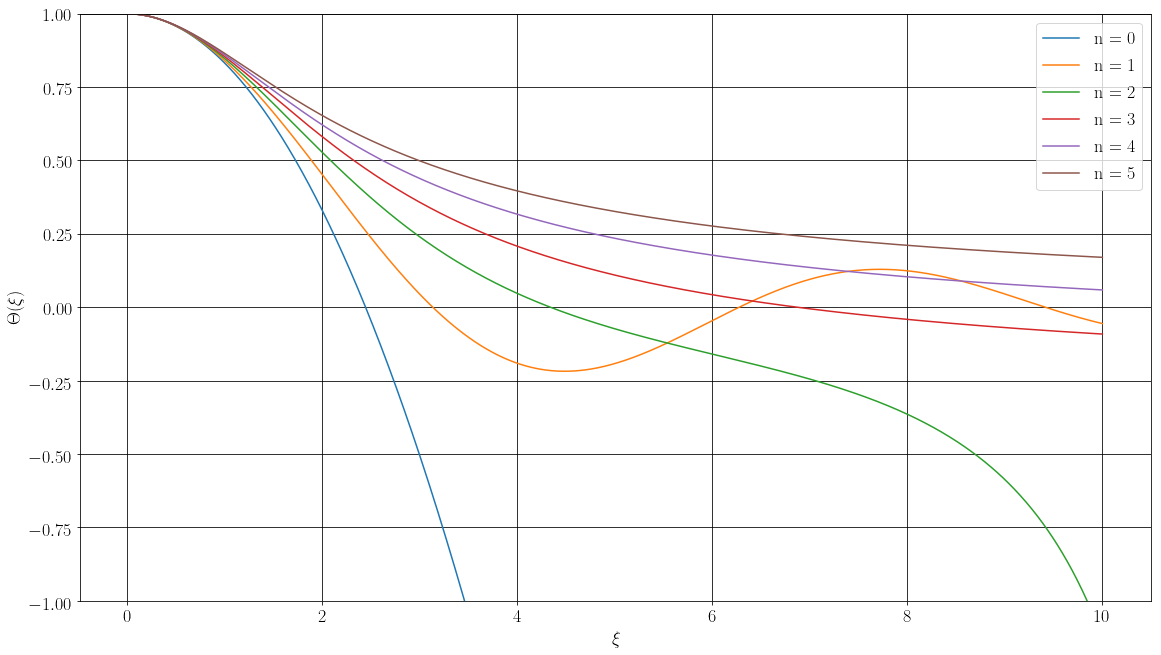

In [18]:
def main ():
    m  = 1000
    dt = 10/m
#figsize controls the plot's resolution, a 1080p (1920x1080) resolution would be reported
#as figsize = (19.20,10.80)

    plt.figure(figsize=(19.20,10.80))
    plt.xlabel(r'$\xi$',fontsize = '18')
    plt.ylabel(r'$\Theta(\xi)$',fontsize='18')
    plt.ylim([-1,1])
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rcParams['font.size'] = 18
    for n in range(0,6):
        
        y1 = np.zeros(m)
        y2 = np.zeros(m)
    
        y  = np.zeros(2)
        y[0] = 1
        y[1] = 0
    
        y1[0] = y[0]
        y2[0] = y[1]
        t = np.zeros(m)
        
        for i in range (m):
            t[i]  = dt*(i+1)
            y     = runkutt(y,t[i],dt,n)
            y1[i] = y[0]
            y2[i] = y[1]
            
        plt.plot(t,y1,label = 'n = ' + str(n))
        
    plt.grid(color = 'black')
    plt.legend()
    plt.show()
    
if __name__ == "__main__":
    main()       